In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('C:/Users/My Lappie/Downloads/Datasets (2)/Decision Tree/Heart Disease Prediction/Dataset/HeartDisease.csv')

In [3]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
df.shape

(303, 14)

In [23]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [36]:
df.corr()['target'][df.corr()['target'] > 0.01].sort_values(ascending=False)

target        1.000000
chest_pain    0.433798
thalach       0.421741
slope         0.345877
rest_ecg      0.137230
Name: target, dtype: float64

In [35]:
df.corr()['target'].sort_values(ascending=False)

target                 1.000000
chest_pain             0.433798
thalach                0.421741
slope                  0.345877
rest_ecg               0.137230
fasting_blood_sugar   -0.028046
cholestrol            -0.085239
rest_bps              -0.144931
age                   -0.225439
gender                -0.280937
thalassemia           -0.344029
ca                    -0.391724
old_peak              -0.430696
exer_angina           -0.436757
Name: target, dtype: float64

C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


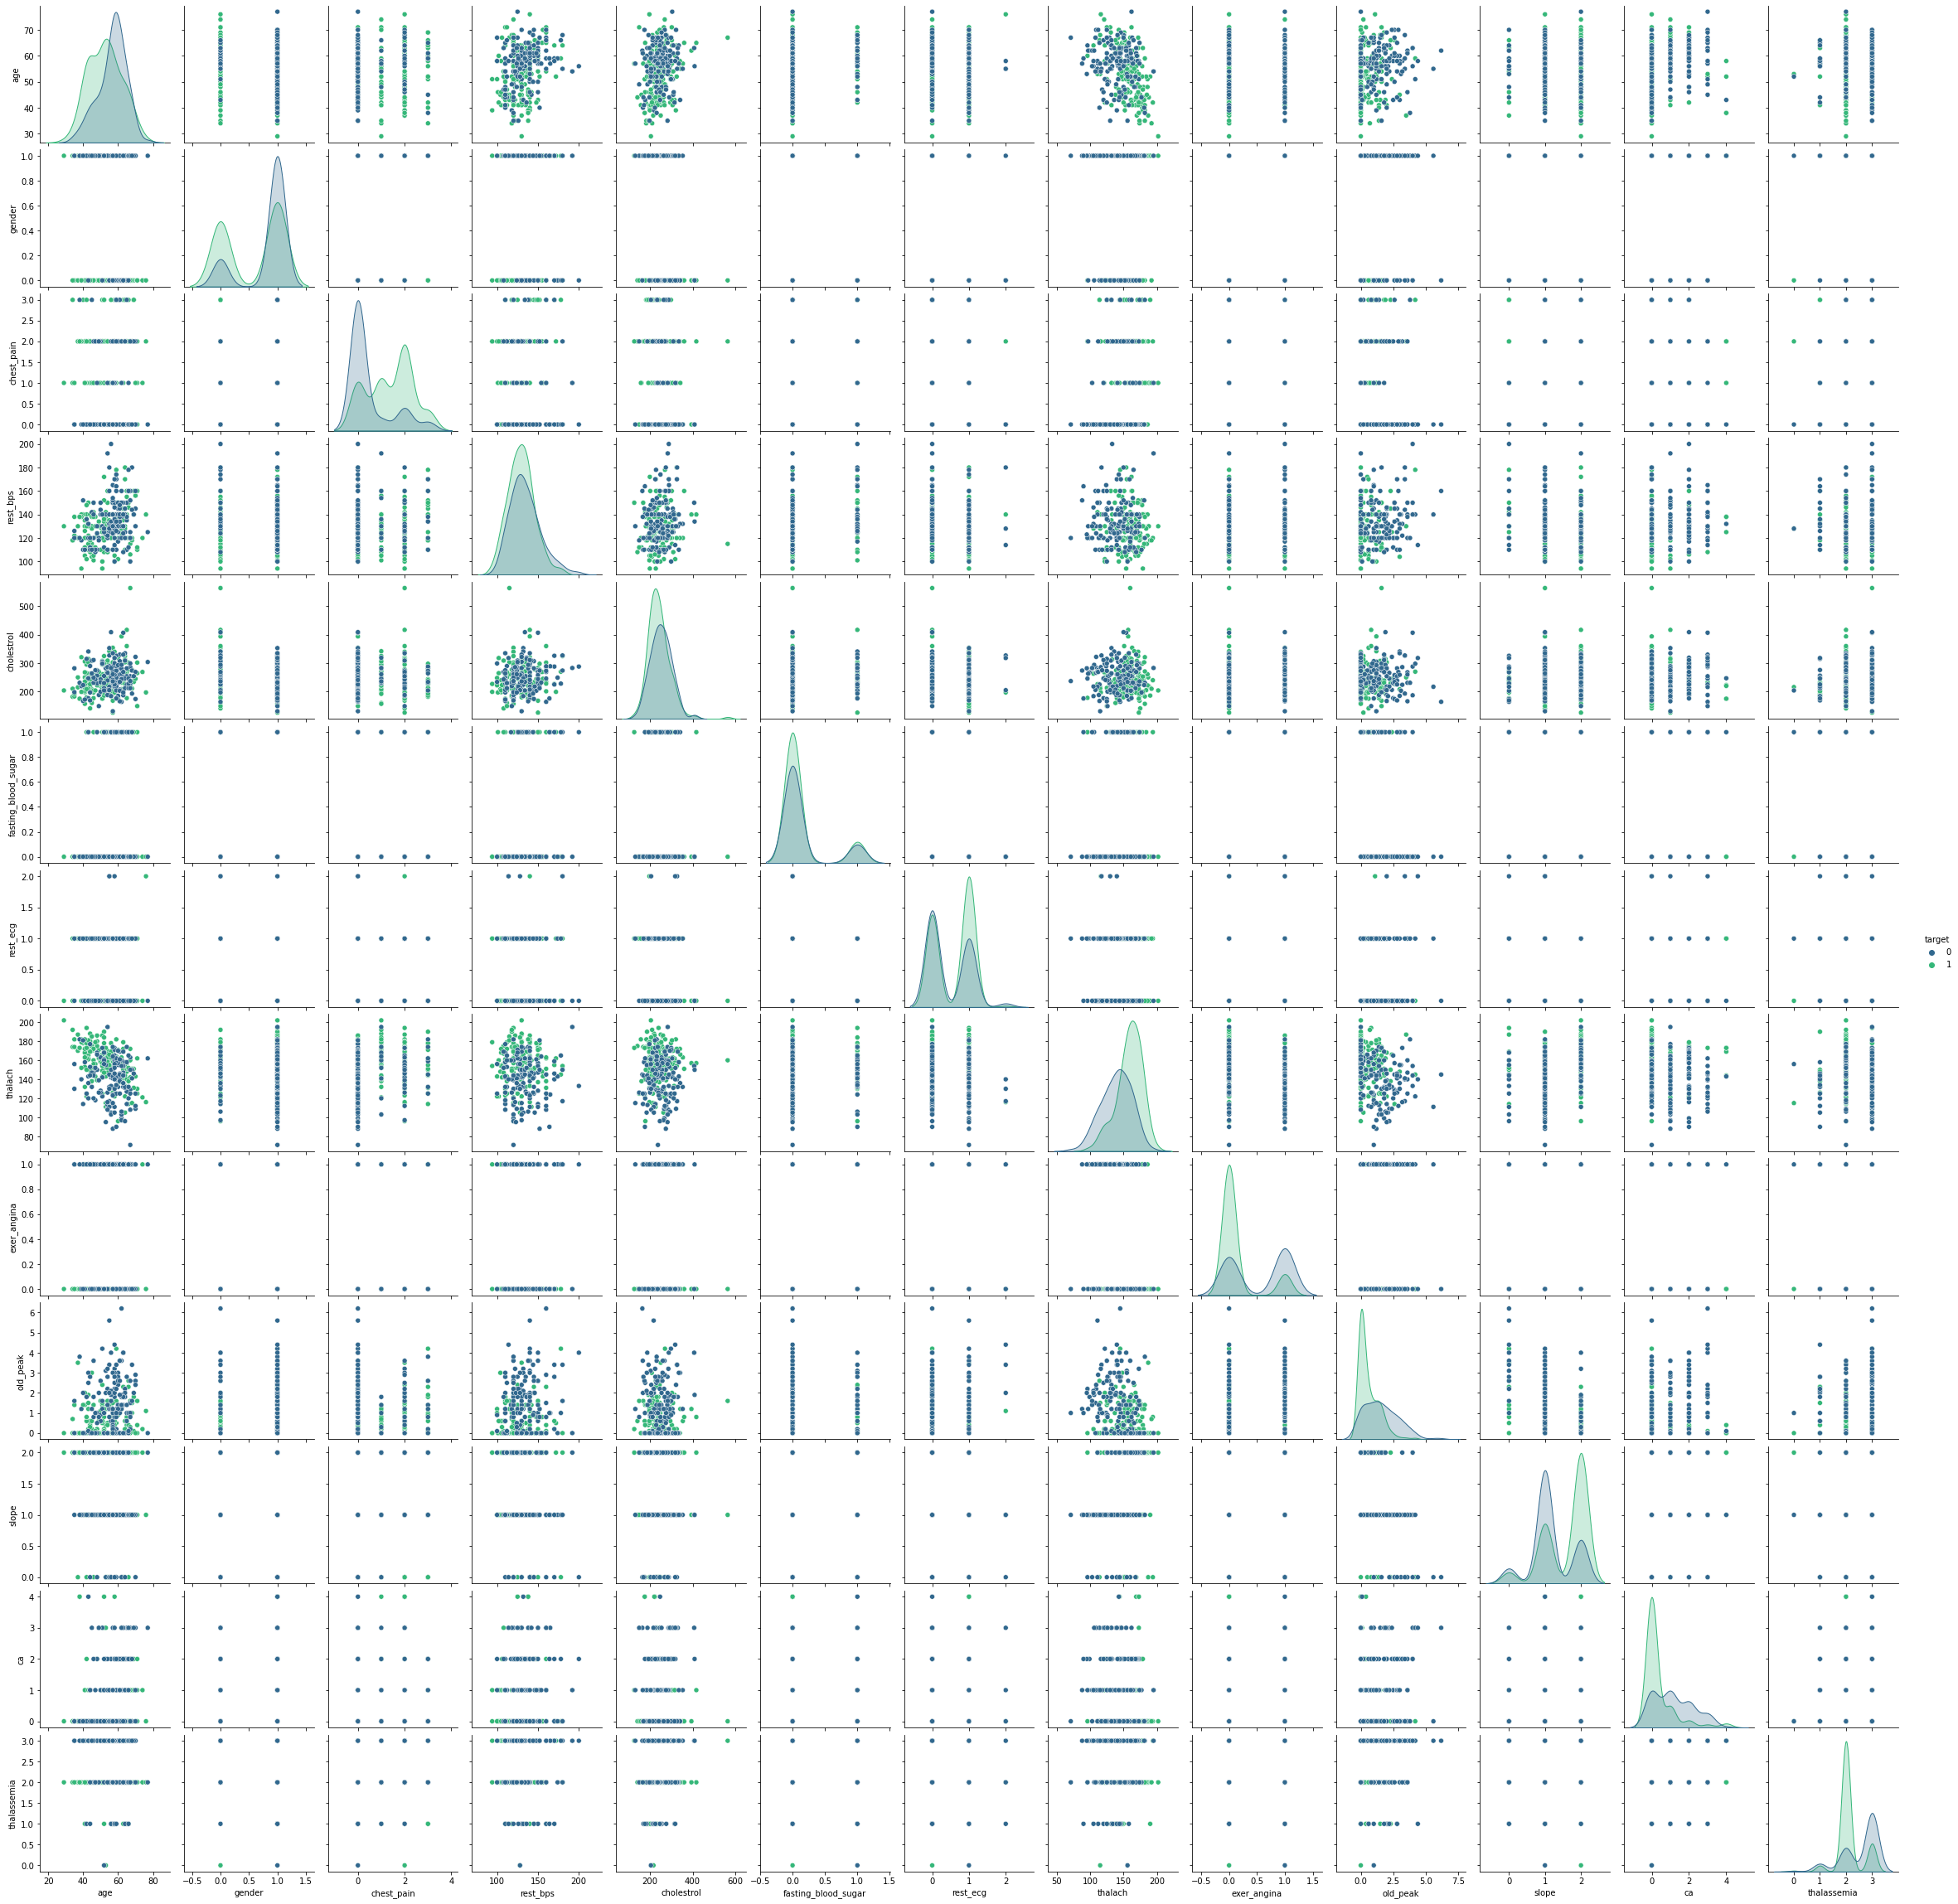

In [37]:
sns.pairplot(df, hue = 'target', palette= 'viridis', size=2.5)  


In [39]:
col = df.columns
col

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\My Lappie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M

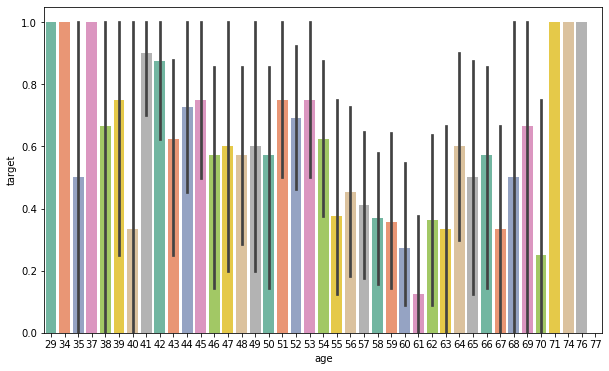

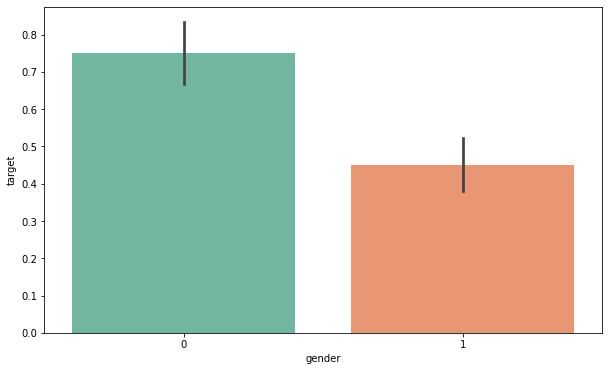

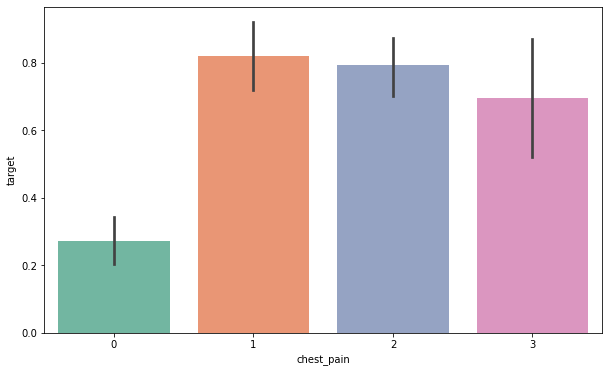

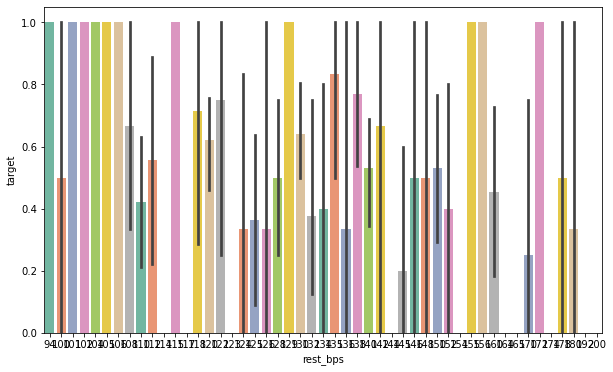

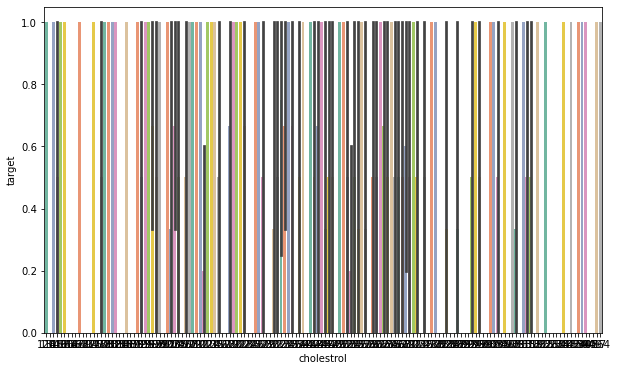

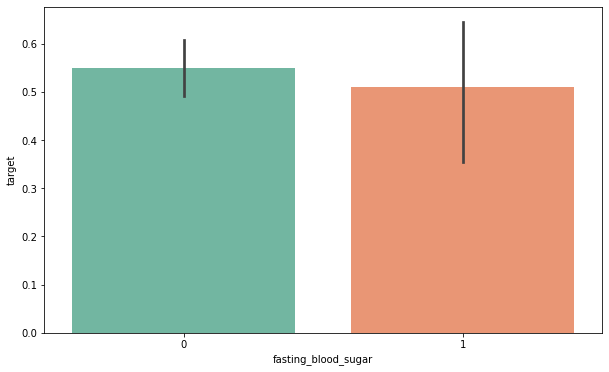

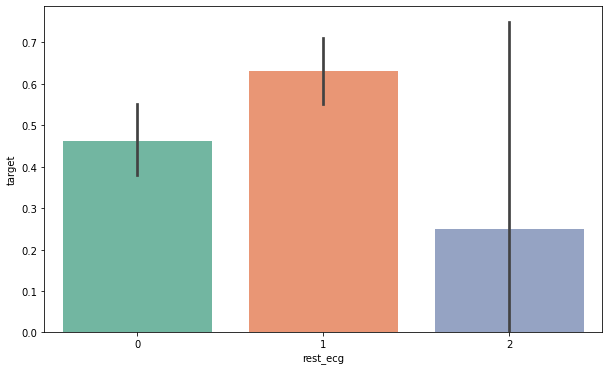

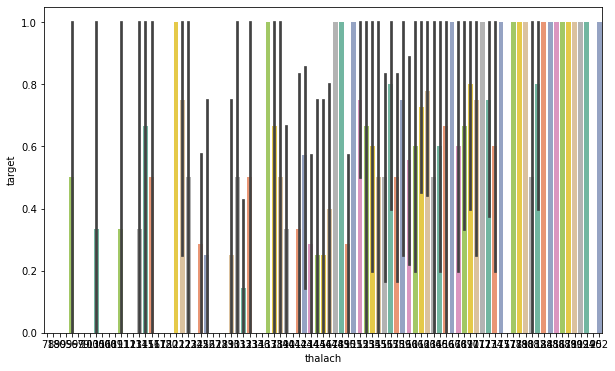

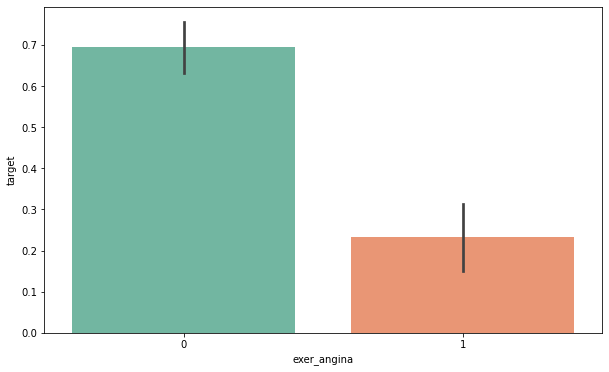

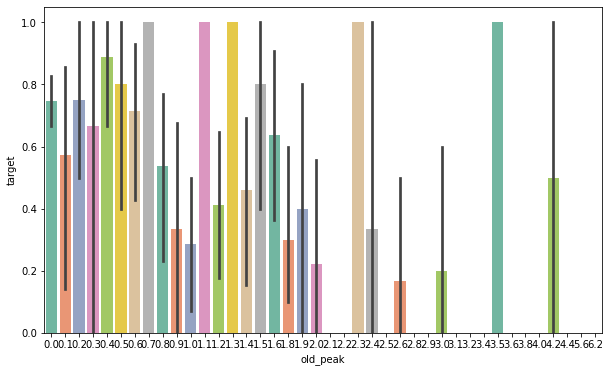

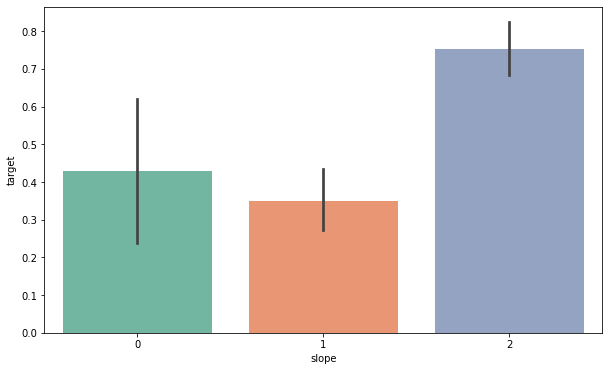

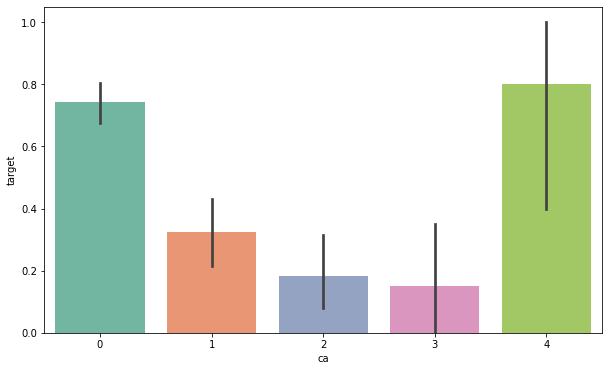

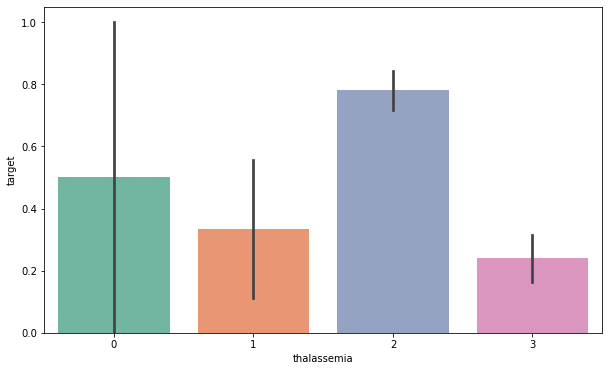

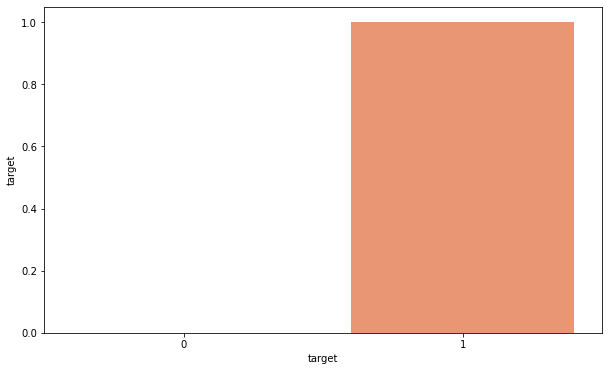

In [40]:
for feature in col:      # ploting barplot for all categorical variable
    plt.figure(figsize = (10,6))
    sns.barplot(feature, 'target', data= df, palette= 'Set2')

In [41]:
y = df['target']
x = df.drop(['target'], axis=1)

### Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [45]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [46]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dt.predict(x_test)

In [49]:
from sklearn import metrics

In [50]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))

Accuracy 0.7582417582417582
Precision 0.7346938775510204
Recall 0.8


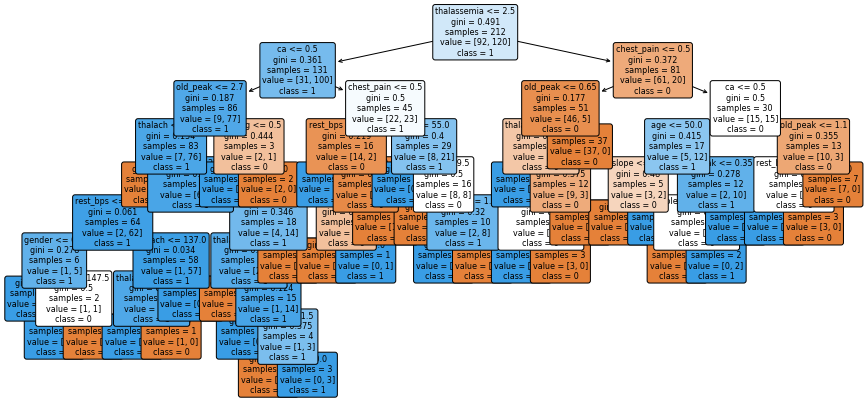

In [51]:
plt.figure(figsize=(15, 7))
tree.plot_tree(dt, 
               filled=True, rounded=True, 
               feature_names = x_train.columns,
               class_names = ['0','1'],
               fontsize=8)
plt.show()

In [52]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [53]:
def report(results, n_top=3):
    for i in range (1, n_top+1):
        candidates= np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print('Model with rank: {0}' .format(i))
            print('Mean validation score: {0: .3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                         results['std_test_score'][candidate]))
            print('Parametres: {0}'.format(results['params'][candidate]))
            print('')

### **Random Search**

In [54]:
param_dist = {'max_depth': [3, None],
             'max_features': sp_randint(1,11),
             'min_samples_split': sp_randint(2,11),
             'criterion':['gini', 'entropy']}

In [55]:
n_iter_search = 15
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter= n_iter_search, cv=5)

In [56]:
start = time()
random_search.fit(x_train, y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter settings.' %((time()-start), n_iter_search))
report(random_search.cv_results_)

Randomized search too 0.59 seconds for 15 candidatesparameter settings.
Model with rank: 1
Mean validation score:  0.807 (std: 0.035)
Parametres: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_split': 4}

Model with rank: 2
Mean validation score:  0.764 (std: 0.017)
Parametres: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_split': 4}

Model with rank: 2
Mean validation score:  0.764 (std: 0.043)
Parametres: {'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 4}



### **Grid Search**

In [57]:
param_grid = {'max_depth': [3, None],
             'max_features': [1,3,10],
             'min_samples_split': [2,3,10],
             'criterion': ['gini', 'entropy']}

In [58]:
grid_search = GridSearchCV(dt, param_grid= param_grid, cv=5)

In [60]:
start = time()
grid_search.fit(x_train, y_train)
print('GridSearchCV took %.2f seconds for %d candidate parameter setting. '
     %(time()-start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)
        

GridSearchCV took 1.08 seconds for 36 candidate parameter setting. 
Model with rank: 1
Mean validation score:  0.783 (std: 0.070)
Parametres: {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}

Model with rank: 2
Mean validation score:  0.783 (std: 0.049)
Parametres: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 10}

Model with rank: 3
Mean validation score:  0.778 (std: 0.057)
Parametres: {'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 10}



In [72]:
dt_random_search = tree.DecisionTreeClassifier(criterion='gini', max_depth= 3, max_features= 7,min_samples_split= 4)

In [73]:
dt_random_search.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_split=4)

In [74]:
y_pred_rs= dt_random_search.predict(x_test)

In [75]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred_rs))
print('Precision', metrics.precision_score(y_test, y_pred_rs))
print('Recall', metrics.recall_score(y_test, y_pred_rs))

Accuracy 0.8241758241758241
Precision 0.7959183673469388
Recall 0.8666666666666667


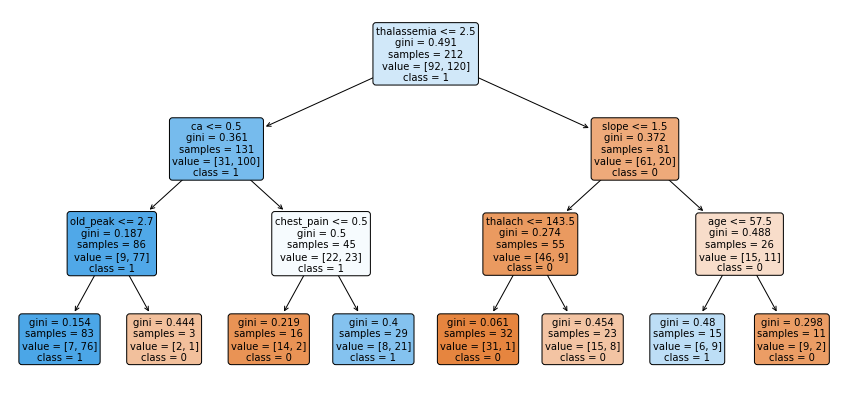

In [76]:
plt.figure(figsize=(15, 7))
tree.plot_tree(dt_random_search, 
               filled=True, rounded=True, 
               feature_names = x_train.columns,
               class_names = ['0','1'],
               fontsize=10)
plt.show()

### **Logistic Regression**

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()

In [81]:
lr2 = LogisticRegression(max_iter=1000)

In [82]:
lr.fit(x_train, y_train)

C:\Users\My Lappie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
lr2.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
y_pred = lr.predict(x_test)   
y_pred2 = lr2.predict(x_test)   

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score

In [88]:
confusion_matrix(y_test, y_pred)

array([[37,  9],
       [ 3, 42]], dtype=int64)

In [89]:
confusion_matrix(y_test, y_pred2)

array([[37,  9],
       [ 4, 41]], dtype=int64)

In [97]:
print('F1 score for lr: ', f1_score(y_test, y_pred))
print('Accuracy for lr: ', accuracy_score(y_test, y_pred))
print('Precision for lr:', precision_score(y_test, y_pred))
print('Recall for lr:   ', recall_score(y_test, y_pred))
print('ROC for Lr:      ', roc_auc_score(y_test, y_pred))

F1 score for lr:  0.8749999999999999
Accuracy for lr:  0.8681318681318682
Precision for lr: 0.8235294117647058
Recall for lr:    0.9333333333333333
ROC for Lr:       0.868840579710145


In [96]:
print('F1 score for lr2: ', f1_score(y_test, y_pred2))
print('Accuracy for lr2: ', accuracy_score(y_test, y_pred2))
print('Recall for lr2:   ', recall_score(y_test, y_pred2))
print('Precision for lr2:', precision_score(y_test, y_pred2))
print('ROC for Lr2:      ', roc_auc_score(y_test, y_pred2))

F1 score for lr2:  0.8631578947368421
Accuracy for lr2:  0.8571428571428571
Recall for lr2:    0.9111111111111111
Precision for lr2: 0.82
ROC for Lr2:       0.8577294685990339
